In [ ]:
# ================================
# STEP 1: Import Required Libraries
# ================================

# ----- Basic -----
import pandas as pd
import numpy as np

# ----- Visualization -----
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Machine Learning -----
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# ----- Display settings -----
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Step 1 completed – Libraries imported successfully!")


✅ Step 1 completed – Libraries imported successfully!


In [4]:
# ================================
# STEP 2: Load Dataset
# ================================

data = pd.read_csv("../data/cleaned/final_merged_dataset.csv")

print("✅ Step 2 completed – Dataset loaded successfully!")
print("Shape of dataset:", data.shape)
display(data.head())


✅ Step 2 completed – Dataset loaded successfully!
Shape of dataset: (6930, 18)


,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,57,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
1,Andaman & Nicobar Islands,Dacoity,2001,7,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
2,Andaman & Nicobar Islands,Dowry Deaths,2001,0,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
3,Andaman & Nicobar Islands,Kidnapping & Abduction,2001,33,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
4,Andaman & Nicobar Islands,Murder,2001,10,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6930 non-null   object 
 1   Crime_Type                      6930 non-null   object 
 2   Year                            6930 non-null   int64  
 3   Cases                           6930 non-null   int64  
 4   unemployment_rate               6930 non-null   float64
 5   poverty_rate                    6930 non-null   float64
 6   per_capita_income               6930 non-null   float64
 7   inflation_rate                  6930 non-null   float64
 8   population_density              6930 non-null   int64  
 9   gender_ratio                    6930 non-null   int64  
 10  literacy_rate                   6930 non-null   float64
 11  youth_population_percent        6930 non-null   float64
 12  urbanization_rate 

,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,2011.500000,2494.161760,5.897364,28.075610,48335.532675,4.983247,103.270130,901.533766,69.921675,25.178312,37.020779,0.652336,10.174026,36.987662,103.738961,2.669688
std,6.344747,8069.454875,0.994195,4.293755,39523.696963,1.419813,96.061581,27.151033,7.350325,2.948810,8.139293,0.054179,4.173605,6.252405,20.232866,0.560403
min,2001.000000,0.000000,2.800000,18.600000,5712.000000,2.000000,10.000000,850.000000,54.960000,16.580000,17.000000,0.484000,5.000000,22.100000,54.000000,1.170000
25%,2006.000000,31.000000,5.230000,24.980000,23480.140000,3.990000,11.000000,879.000000,64.190000,22.920000,30.400000,0.616000,7.000000,32.200000,89.000000,2.280000
50%,2011.500000,285.000000,5.955000,27.500000,38289.500000,5.035000,87.000000,904.000000,69.240000,25.650000,36.700000,0.654000,9.000000,37.600000,104.000000,2.650000
75%,2017.000000,1398.750000,6.590000,31.000000,66358.000000,5.950000,165.000000,923.000000,75.070000,27.580000,43.800000,0.691000,13.000000,41.700000,117.000000,3.070000
max,2022.000000,163119.000000,8.550000,39.230000,199643.430000,8.870000,408.000000,952.000000,84.520000,31.000000,54.400000,0.810000,19.000000,51.100000,166.000000,4.070000


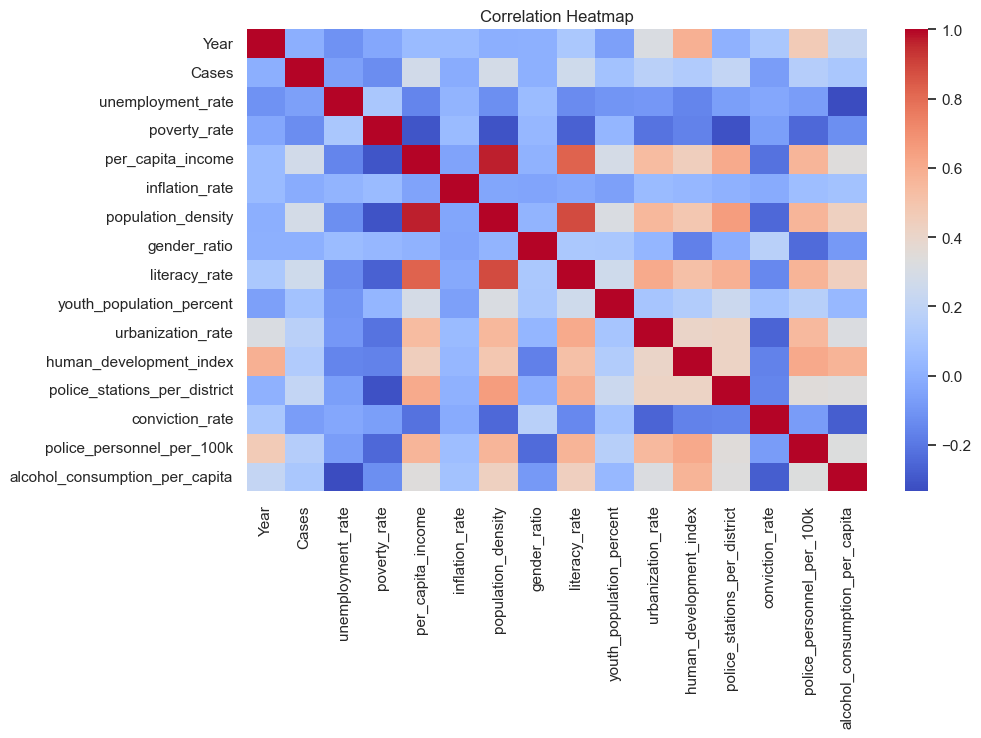

✅ Step 3 completed – Dataset understood!


In [5]:
# ================================
# STEP 3: Basic EDA
# ================================

print("🔹 Dataset Info:")
data.info()

print("\n🔹 Missing values:")
print(data.isnull().sum())

print("\n🔹 Duplicate rows:", data.duplicated().sum())

print("\n🔹 Summary Statistics:")
display(data.describe())

# --- Correlation heatmap for numeric features ---
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

print("✅ Step 3 completed – Dataset understood!")


In [6]:
# ================================
# STEP 4: Data Cleaning
# ================================

# Already cleaned dataset (final_merged_dataset.csv)
# Just verify again
print("Missing values:", data.isnull().sum().sum())
print("Duplicate rows:", data.duplicated().sum())

print("✅ Step 4 completed – Data is clean!")


Missing values: 0
Duplicate rows: 0
✅ Step 4 completed – Data is clean!


In [7]:
# ================================
# STEP 5: Feature Selection
# ================================

# Target variable (Dependent)
y = data["Cases"]

# Independent variables (features)
X = data[[
    "State", "Crime_Type", "Year",
    "unemployment_rate", "poverty_rate", "per_capita_income",
    "inflation_rate", "population_density", "gender_ratio",
    "literacy_rate", "youth_population_percent", "urbanization_rate",
    "human_development_index", "police_stations_per_district",
    "conviction_rate", "police_personnel_per_100k",
    "alcohol_consumption_per_capita"
]]

print("✅ Step 5 completed – Features & Target selected!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Step 5 completed – Features & Target selected!
X shape: (6930, 17)
y shape: (6930,)


In [8]:
# ================================
# STEP 6: Encode & Scale
# ================================

cat_cols = ["State", "Crime_Type"]
num_cols = [col for col in X.columns if col not in cat_cols]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

X_transformed = preprocessor.fit_transform(X)

print("✅ Step 6 completed – Encoding & Scaling done!")
print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)


✅ Step 6 completed – Encoding & Scaling done!
Original shape: (6930, 17)
Transformed shape: (6930, 59)


In [9]:
# ================================
# STEP 7: Train–Validation–Test Split (Year-based)
# ================================

# Create masks
train_mask = (data["Year"] >= 2001) & (data["Year"] <= 2017)
val_mask   = (data["Year"] >= 2018) & (data["Year"] <= 2020)
test_mask  = (data["Year"] >= 2021) & (data["Year"] <= 2022)

# Convert transformed array to DataFrame for masking
X_df = pd.DataFrame(X_transformed, index=data.index)

# Apply masks
X_train, y_train = X_df[train_mask], y[train_mask]
X_val, y_val     = X_df[val_mask],   y[val_mask]
X_test, y_test   = X_df[test_mask],  y[test_mask]

print("✅ Step 7 completed – Year-based split done!")
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


✅ Step 7 completed – Year-based split done!
Train: (5355, 59), Val: (945, 59), Test: (630, 59)


🔍 Correlation of features with Crime Cases:

Cases                             1.000000
population_density                0.284434
per_capita_income                 0.270389
literacy_rate                     0.261220
police_stations_per_district      0.208827
urbanization_rate                 0.175745
police_personnel_per_100k         0.154019
human_development_index           0.136850
alcohol_consumption_per_capita    0.111793
youth_population_percent          0.083688
gender_ratio                     -0.000286
Year                             -0.001941
inflation_rate                   -0.012608
unemployment_rate                -0.060418
conviction_rate                  -0.069536
poverty_rate                     -0.126144
Name: Cases, dtype: float64


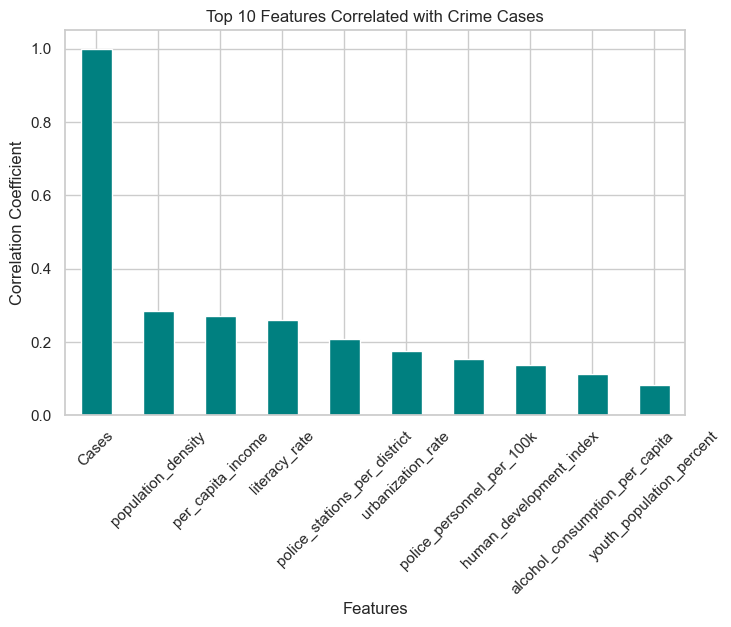

In [10]:
# ================================
# STEP 7A: Correlation Analysis (Feature Impact)
# ================================

# Compute correlation of all numeric columns with 'Cases'
corr_with_cases = data.corr(numeric_only=True)["Cases"].sort_values(ascending=False)

print("🔍 Correlation of features with Crime Cases:\n")
print(corr_with_cases)

# Plot top 10 correlated features
plt.figure(figsize=(8,5))
corr_with_cases.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Features Correlated with Crime Cases")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()


✅ Simple Linear Regression (Year → Cases) Evaluation Results:

📊 Train Set Performance:
R² Score: 0.0000
MAE: 3452.71
RMSE: 8166.25

📊 Test Set Performance:
R² Score: -0.0010
MAE: 3300.09
RMSE: 7022.09


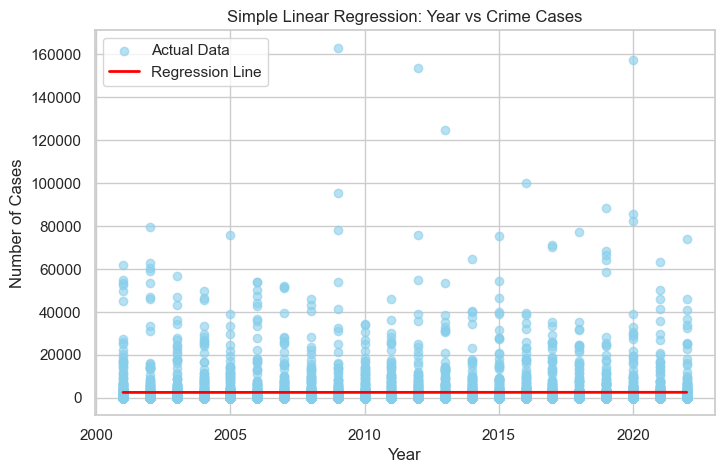

💾 Model saved successfully as 'simple_linear_regression_year.pkl'


In [11]:
# ================================
# STEP 8: Simple Linear Regression (Year → Cases)
# ================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 1️⃣ Independent and Dependent Variables
X_year = data[["Year"]]     # Predictor → Year
y_cases = data["Cases"]      # Target → Cases

# 2️⃣ Split Data Year-wise
train_mask = (data["Year"] >= 2001) & (data["Year"] <= 2020)
test_mask  = (data["Year"] >= 2021) & (data["Year"] <= 2022)

X_train, y_train = X_year[train_mask], y_cases[train_mask]
X_test, y_test   = X_year[test_mask],  y_cases[test_mask]

# 3️⃣ Initialize and Train the Model
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

# 4️⃣ Predict on Train and Test Sets
y_train_pred = simple_lr.predict(X_train)
y_test_pred  = simple_lr.predict(X_test)

# 5️⃣ Evaluate the Model
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

print("✅ Simple Linear Regression (Year → Cases) Evaluation Results:")
evaluate(y_train, y_train_pred, "Train")
evaluate(y_test,  y_test_pred,  "Test")

# 6️⃣ Plot: Year vs Cases (Regression Line)
plt.figure(figsize=(8,5))
plt.scatter(X_year, y_cases, color="skyblue", label="Actual Data", alpha=0.6)
plt.plot(X_year, simple_lr.predict(X_year), color="red", label="Regression Line", linewidth=2)
plt.title("Simple Linear Regression: Year vs Crime Cases")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

# 7️⃣ Save the Model
with open("../model/simple_linear_regression_year.pkl", "wb") as f:
    pickle.dump(simple_lr, f)

print("💾 Model saved successfully as 'simple_linear_regression_year.pkl'")


✅ Year-based split verified!
Train: (6300, 59), Test: (630, 59)

✅ Multiple Linear Regression Evaluation Results:

📊 Train Set Performance:
R² Score: 0.3767
MAE: 2843.70
RMSE: 6447.38

📊 Test Set Performance:
R² Score: 0.4490
MAE: 2751.42
RMSE: 5210.02


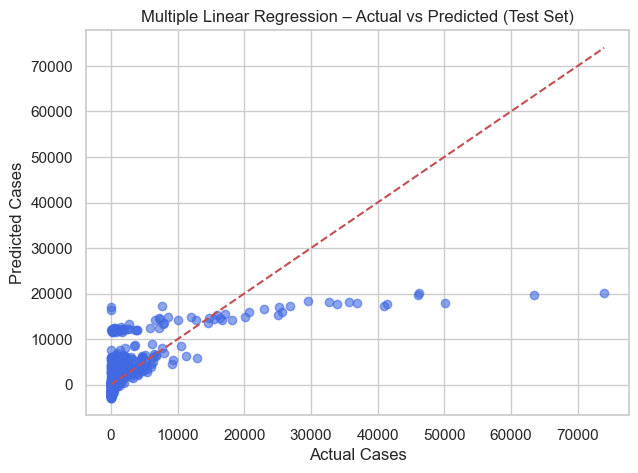

💾 Model saved successfully as 'multiple_linear_regression.pkl'


In [12]:
# ============================================
# STEP 9 : MULTIPLE LINEAR REGRESSION MODEL (Train: 2001–2020, Test: 2021–2022)
# ============================================

# ✅ Ensure aligned indexes
X_df = pd.DataFrame(X_transformed, index=data.index).reset_index(drop=True)
data_reset = data.reset_index(drop=True)
y_reset = y.reset_index(drop=True)

# -------------------- Split by Year --------------------
train_mask = (data_reset["Year"] >= 2001) & (data_reset["Year"] <= 2020)
test_mask  = (data_reset["Year"] >= 2021) & (data_reset["Year"] <= 2022)

X_train, y_train = X_df[train_mask], y_reset[train_mask]
X_test, y_test   = X_df[test_mask],  y_reset[test_mask]

print("✅ Year-based split verified!")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# -------------------- Train the Model --------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# -------------------- Predict --------------------
y_train_pred = multi_lr.predict(X_train)
y_test_pred  = multi_lr.predict(X_test)

# -------------------- Evaluate --------------------
def evaluate(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n📊 {name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

print("\n✅ Multiple Linear Regression Evaluation Results:")
evaluate(y_train, y_train_pred, "Train")
evaluate(y_test,  y_test_pred,  "Test")

# -------------------- Plot Actual vs Predicted --------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("Multiple Linear Regression – Actual vs Predicted (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

# -------------------- Save Model --------------------
with open("../model/multiple_linear_regression.pkl", "wb") as f:
    pickle.dump(multi_lr, f)

print("💾 Model saved successfully as 'multiple_linear_regression.pkl'")


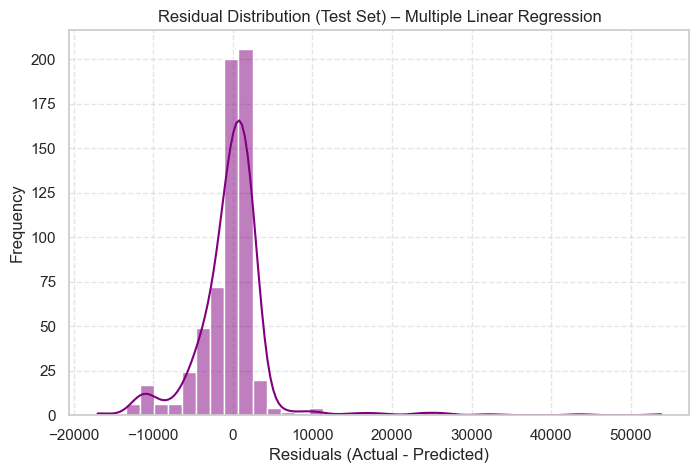

In [13]:
# -------------------- Residual Plot (Errors) --------------------
residuals = y_test - y_test_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, bins=40, color='purple')
plt.title("Residual Distribution (Test Set) – Multiple Linear Regression")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
